## Upload Gambar

Mounted at /content/gdrive


Saving ayam_tunggal_0002-03_20231116_05_145g.jpg to ayam_tunggal_0002-03_20231116_05_145g.jpg
1/1 [==============================] - 1s 1s/step
Predicted Class Index: 1


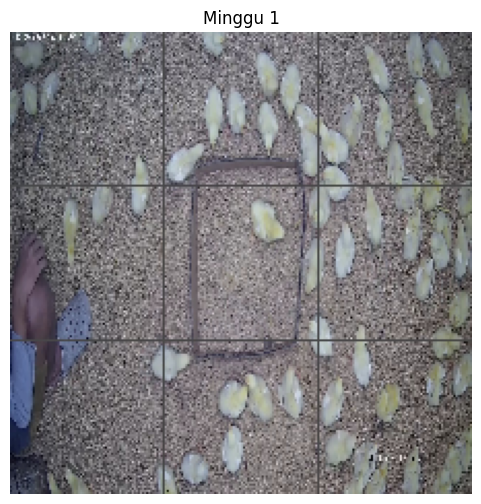

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive', force_remount=True)
class_names = ["Minggu 1", "Minggu 2", "Minggu 3", "Minggu 4"]
# Load the saved model
model_path = '/content/gdrive/MyDrive/Skripsi/Saved Model/KlasifikasiUmurFix.h5'
model = load_model(model_path)

# Upload an image file
uploaded = files.upload()
uploaded_file_path = next(iter(uploaded))

# Load and preprocess the uploaded image
img = load_img(
    uploaded_file_path,
    target_size=(224, 224)
)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform prediction using the loaded model
predictions = model.predict(x)

# Apply softmax to convert logits to probabilities
predictions = tf.nn.softmax(predictions)

# Get the predicted class indices
predicted_class_indices = tf.argmax(predictions, axis=1)

print('Predicted Class Index:', predicted_class_indices.numpy()[0] + 1)

predicted_class_index = predicted_class_indices.numpy()[0] + 1

# Display the uploaded image with predicted class label
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(class_names[predicted_class_index - 1])
plt.axis("off")
plt.show()


## Kirim Data Hasil Klasifikasi

In [ ]:
!pip install paho-mqtt==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.1-py3-none-any.whl size=61549 sha256=4d091b00a7b568f8ab99d71ff3e0b49bcb0c79b0953d092daa18ccf382aec091
  Stored in directory: /root/.cache/pip/wheels/b6/72/f9/44ca415a44f9cc7468fe4c59e6282938e504fadec09641fa63
Successfully built paho-mqtt


In [ ]:
from paho.mqtt import client as mqtt_client
import time

# Define MQTT parameters
mqtt_broker_address = "xxxx"
mqtt_broker_port = 1883
mqtt_topic = "AIumur"
mqtt_username = "yyyy"
mqtt_password = "zzzz"
client_id = "AI-testing"

def connect_mqtt():
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Connected to MQTT Broker!")
        else:
            print("Failed to connect, return code %d\n", rc)
    client = mqtt_client.Client(client_id)
    client.on_connect = on_connect
    client.username_pw_set(mqtt_username, mqtt_password)
    client.connect(mqtt_broker_address, mqtt_broker_port)
    return client

def publish_to_mqtt(predicted_class_index, client_id):
    client = connect_mqtt()
    msg_count = 1
    while True:
        time.sleep(5)
        payload = str(predicted_class_index)
        result = client.publish(mqtt_topic, payload)
        status = result[0]
        if status == 0:
            print(f"Published predicted class index `{predicted_class_index}` to topic `{mqtt_topic}`")
        else:
            print(f"Failed to publish predicted class index to topic {mqtt_topic}")
        msg_count += 1
        if msg_count > 5:
            break
    client.disconnect()

# Publish the predicted class index to MQTT broker
publish_to_mqtt(predicted_class_index, client_id)


Published predicted class index `1` to topic `AIumur`
Published predicted class index `1` to topic `AIumur`
Published predicted class index `1` to topic `AIumur`
Published predicted class index `1` to topic `AIumur`
Published predicted class index `1` to topic `AIumur`
